<a href="https://colab.research.google.com/github/NayakAbhishek/NayakAbhishek/blob/main/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.6 MB/s eta 0:00:00


In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# set the aesthetic style of the plots
sns.set_style()

# filter warning messages
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
# set default matplotlib parameters
COLOR = '#ababab'
mpl.rcParams['figure.titlesize'] = 16
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['grid.color'] = COLOR
mpl.rcParams['grid.alpha'] = 0.1

In [4]:
# import data set and create a data frame
df_credit = pd.read_csv('http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0')

In [9]:
# show first 100 rows
df_credit.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


from matplotlib import pyplot as plt
_df_28['score_3'].plot(kind='hist', bins=20, title='score_3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['score_4'].plot(kind='hist', bins=20, title='score_4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['score_5'].plot(kind='hist', bins=20, title='score_5')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['score_6'].plot(kind='hist', bins=20, title='score_6')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('ids').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_33.groupby('target_default').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('score_1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_35.groupby('score_2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='score_3', y='score_4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='score_4', y='score_5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='score_5', y='score_6', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='score_6', y='risk_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['n_defaulted_loans']
  ys = series['score_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('n_defaulted_loans', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ids')):
  _plot_series(series, series_name, i)
  fig.legend(title='ids', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('n_defaulted_loans')
_ = plt.ylabel('score_3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['n_defaulted_loans']
  ys = series['score_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('n_defaulted_loans', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('target_default')):
  _plot_series(series, series_name, i)
  fig.legend(title='target_default', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('n_defaulted_loans')
_ = plt.ylabel('score_3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['n_defaulted_loans']
  ys = series['score_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('n_defaulted_loans', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('score_1')):
  _plot_series(series, series_name, i)
  fig.legend(title='score_1', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('n_defaulted_loans')
_ = plt.ylabel('score_3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['n_defaulted_loans']
  ys = series['score_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('n_defaulted_loans', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('score_2')):
  _plot_series(series, series_name, i)
  fig.legend(title='score_2', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('n_defaulted_loans')
_ = plt.ylabel('score_3')

from matplotlib import pyplot as plt
_df_44['score_3'].plot(kind='line', figsize=(8, 4), title='score_3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['score_4'].plot(kind='line', figsize=(8, 4), title='score_4')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['score_5'].plot(kind='line', figsize=(8, 4), title='score_5')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['score_6'].plot(kind='line', figsize=(8, 4), title='score_6')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['target_default'].value_counts()
    for x_label, grp in _df_48.groupby('ids')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ids')
_ = plt.ylabel('target_default')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['score_1'].value_counts()
    for x_label, grp in _df_49.groupby('target_default')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('target_default')
_ = plt.ylabel('score_1')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['score_2'].value_counts()
    for x_label, grp in _df_50.groupby('score_1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('score_1')
_ = plt.ylabel('score_2')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['reason'].value_counts()
    for x_label, grp in _df_51.groupby('score_2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('score_2')
_ = plt.ylabel('reason')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['ids'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='score_3', y='ids', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_53['target_default'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='score_3', y='target_default', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_54['score_1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_54, x='score_3', y='score_1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_55['score_2'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_55, x='score_3', y='score_2', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## **Data Analysis**



In [10]:
# data frame shape
print('Number of rows: ', df_credit.shape[0])
print('Number of columns: ', df_credit.shape[1])

Number of rows:  45000
Number of columns:  43


Number of rows:  45000
Number of columns:  43
We are working with a data set containing 43 features for 45,000 clients. `target_default` is a True/False feature and is the target variable we are trying to predict. We'll explore all features searching for outliers, treating possible missing values, and making other necessary adjustments to improve the overall quality of the model.

Let's examine the structure of the data set.

In [11]:
# data frame summary
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

In [12]:
# percentage of missing values per feature
print((df_credit.isnull().sum() * 100 / df_credit.shape[0]).sort_values(ascending=False))

target_fraud                                        96.617778
last_amount_borrowed                                66.568889
last_borrowed_in_months                             66.568889
ok_since                                            58.988889
external_data_provider_credit_checks_last_2_year    50.284444
external_data_provider_credit_checks_last_year      33.608889
credit_limit                                        30.666667
n_issues                                            25.653333
facebook_profile                                     9.906667
marketing_channel                                    7.951111
job_name                                             7.413333
target_default                                       7.242222
external_data_provider_email_seen_before             4.962222
lat_lon                                              3.028889
user_agent                                           1.604444
n_bankruptcies                                       1.548889
n_defaul

First of all, note that `target_default` has missing values. As this is our target variable, we don't have a lot of options here. So, we'll eliminate all entries where `target_default` is null.

In [13]:
df_credit.dropna(subset=['target_default'], inplace=True)

Observe that `target_fraud` has almost all its entries missing. As this feature is not crucial for the project, we are dropping it.

Other variables also have a high rate of missing values, but we are not dealing with them by now.

In [14]:
# drop the column "target_fraud"
df_credit.drop('target_fraud', axis=1, inplace=True)

Now, let's examine the number of unique values for each feature.

In [15]:
# number of unique observations per column
df_credit.nunique().sort_values()

,0
channel,1
external_data_provider_credit_checks_last_2_year,1
last_borrowed_in_months,2
target_default,2
facebook_profile,2
external_data_provider_credit_checks_last_year,2
external_data_provider_credit_checks_last_month,4
real_state,5
n_defaulted_loans,5
email,6


In [16]:
# drop the columns "channel" and "external_data_provider_credit_checks_last_2_year"
df_credit.drop(labels=['channel', 'external_data_provider_credit_checks_last_2_year'], axis=1, inplace=True)

Moving on with the cleaning process, to keep the data set as adequate as possible we'll remove some other columns that are not adding value to the model. Some features, as `score_1` and `score_2`, are filled with hashed values. However, we are keeping these variables as they might be useful to our model.

In [17]:
df_credit.drop(labels=['email', 'reason', 'zip', 'job_name', 'external_data_provider_first_name', 'lat_lon',
                       'shipping_zip_code', 'user_agent', 'profile_tags', 'marketing_channel',
                       'profile_phone_number', 'application_time_applied', 'ids'], axis=1, inplace=True)

Ok, now we are working with a leaner data set. Before dealing with the missing values, let's examine if there are outliers in the data set. We'll start by taking a look at some statistical details of the numerical features.



In [18]:
# show descriptive statistics
df_credit.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,14133.000000,14133.000000,28632.000000,4.174100e+04,17276.000000,41606.000000,41729.000000,41741.000000,30818.000000,41741.000000,41741.000000,27720.000000,39656.000000,41741.000000,41741.0
mean,346.459836,100.006820,0.499416,99.919399,0.294451,13328.104095,40.588410,33877.220453,7.108012e+04,35.192174,0.076696,0.004625,10.639108,11.023882,247.748545,1.504396,0.504185,12.731188,500.491771,inf
std,110.102271,3.183821,0.288085,10.022703,0.101561,7918.698433,9.437936,36141.985884,5.225978e+04,21.629577,0.274820,0.080157,4.588175,4.596036,146.326172,1.114207,0.499992,125.711218,287.993121,NaN
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,403.0
25%,270.000000,97.862546,0.251595,93.182517,0.220000,7210.280000,36.000000,9975.000000,4.401958e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,1.000000,0.000000,11.000000,252.000000,50910.0
50%,340.000000,100.017950,0.500174,99.977774,0.290000,12011.050000,36.000000,25213.000000,6.004409e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,2.000000,1.000000,27.000000,502.000000,101623.0
75%,420.000000,102.143100,0.747630,106.630991,0.360000,18030.160000,36.000000,46492.500000,8.503289e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,2.000000,1.000000,43.000000,747.000000,151248.0
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,3.000000,1.000000,59.000000,1000.000000,inf


from matplotlib import pyplot as plt
_df_56['score_3'].plot(kind='hist', bins=20, title='score_3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57['score_4'].plot(kind='hist', bins=20, title='score_4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58['score_5'].plot(kind='hist', bins=20, title='score_5')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_59['score_6'].plot(kind='hist', bins=20, title='score_6')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_60.plot(kind='scatter', x='score_3', y='score_4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_61.plot(kind='scatter', x='score_4', y='score_5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_62.plot(kind='scatter', x='score_5', y='score_6', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_63.plot(kind='scatter', x='score_6', y='risk_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_64['score_3'].plot(kind='line', figsize=(8, 4), title='score_3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_65['score_4'].plot(kind='line', figsize=(8, 4), title='score_4')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_66['score_5'].plot(kind='line', figsize=(8, 4), title='score_5')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_67['score_6'].plot(kind='line', figsize=(8, 4), title='score_6')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_68['score_3'].plot(kind='hist', bins=20, title='score_3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_69['score_4'].plot(kind='hist', bins=20, title='score_4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_70['score_5'].plot(kind='hist', bins=20, title='score_5')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_71['score_6'].plot(kind='hist', bins=20, title='score_6')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_72.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_73.plot(kind='scatter', x='score_3', y='score_4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_74.plot(kind='scatter', x='score_4', y='score_5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_75.plot(kind='scatter', x='score_5', y='score_6', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_76.plot(kind='scatter', x='score_6', y='risk_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_77['score_3'].plot(kind='line', figsize=(8, 4), title='score_3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_78['score_4'].plot(kind='line', figsize=(8, 4), title='score_4')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_79['score_5'].plot(kind='line', figsize=(8, 4), title='score_5')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_80['score_6'].plot(kind='line', figsize=(8, 4), title='score_6')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_81['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_81, x='score_3', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_82['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_82, x='score_4', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_83['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_83, x='score_5', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_84['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_84, x='score_6', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [19]:
# count of "inf" values in "reported_income"
np.isinf(df_credit['reported_income']).sum()

66

In [20]:
# count of values = -999 in "external_data_provider_email_seen_before"
df_credit.loc[df_credit['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before'].value_counts()

,count
external_data_provider_email_seen_before,
-999.0,591


First of all, when examining the statistics above, we noticed that `reported_income` has 66 values displayed as "inf". Additionally, we have 591 values of `external_data_provider_email_seen_before` displayed as *-999*. We'll replace these values with NaN, so we can plot histograms to visualize the values' distributions.

In [21]:
# replace "inf" values with "nan"
df_credit['reported_income'] = df_credit['reported_income'].replace(np.inf, np.nan)

# replace "-999" values with "nan"
df_credit.loc[df_credit['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before'] = np.nan

A new data frame, containing numerical features of interest, will be created. Plotting a histogram for these features will helps us examine their distribution.

In [22]:
# data frame containing numerical features
df_credit_numerical = df_credit[['score_3', 'risk_rate', 'last_amount_borrowed',
                                 'last_borrowed_in_months', 'credit_limit', 'income', 'ok_since',
                                 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues',
                                 'external_data_provider_email_seen_before']]

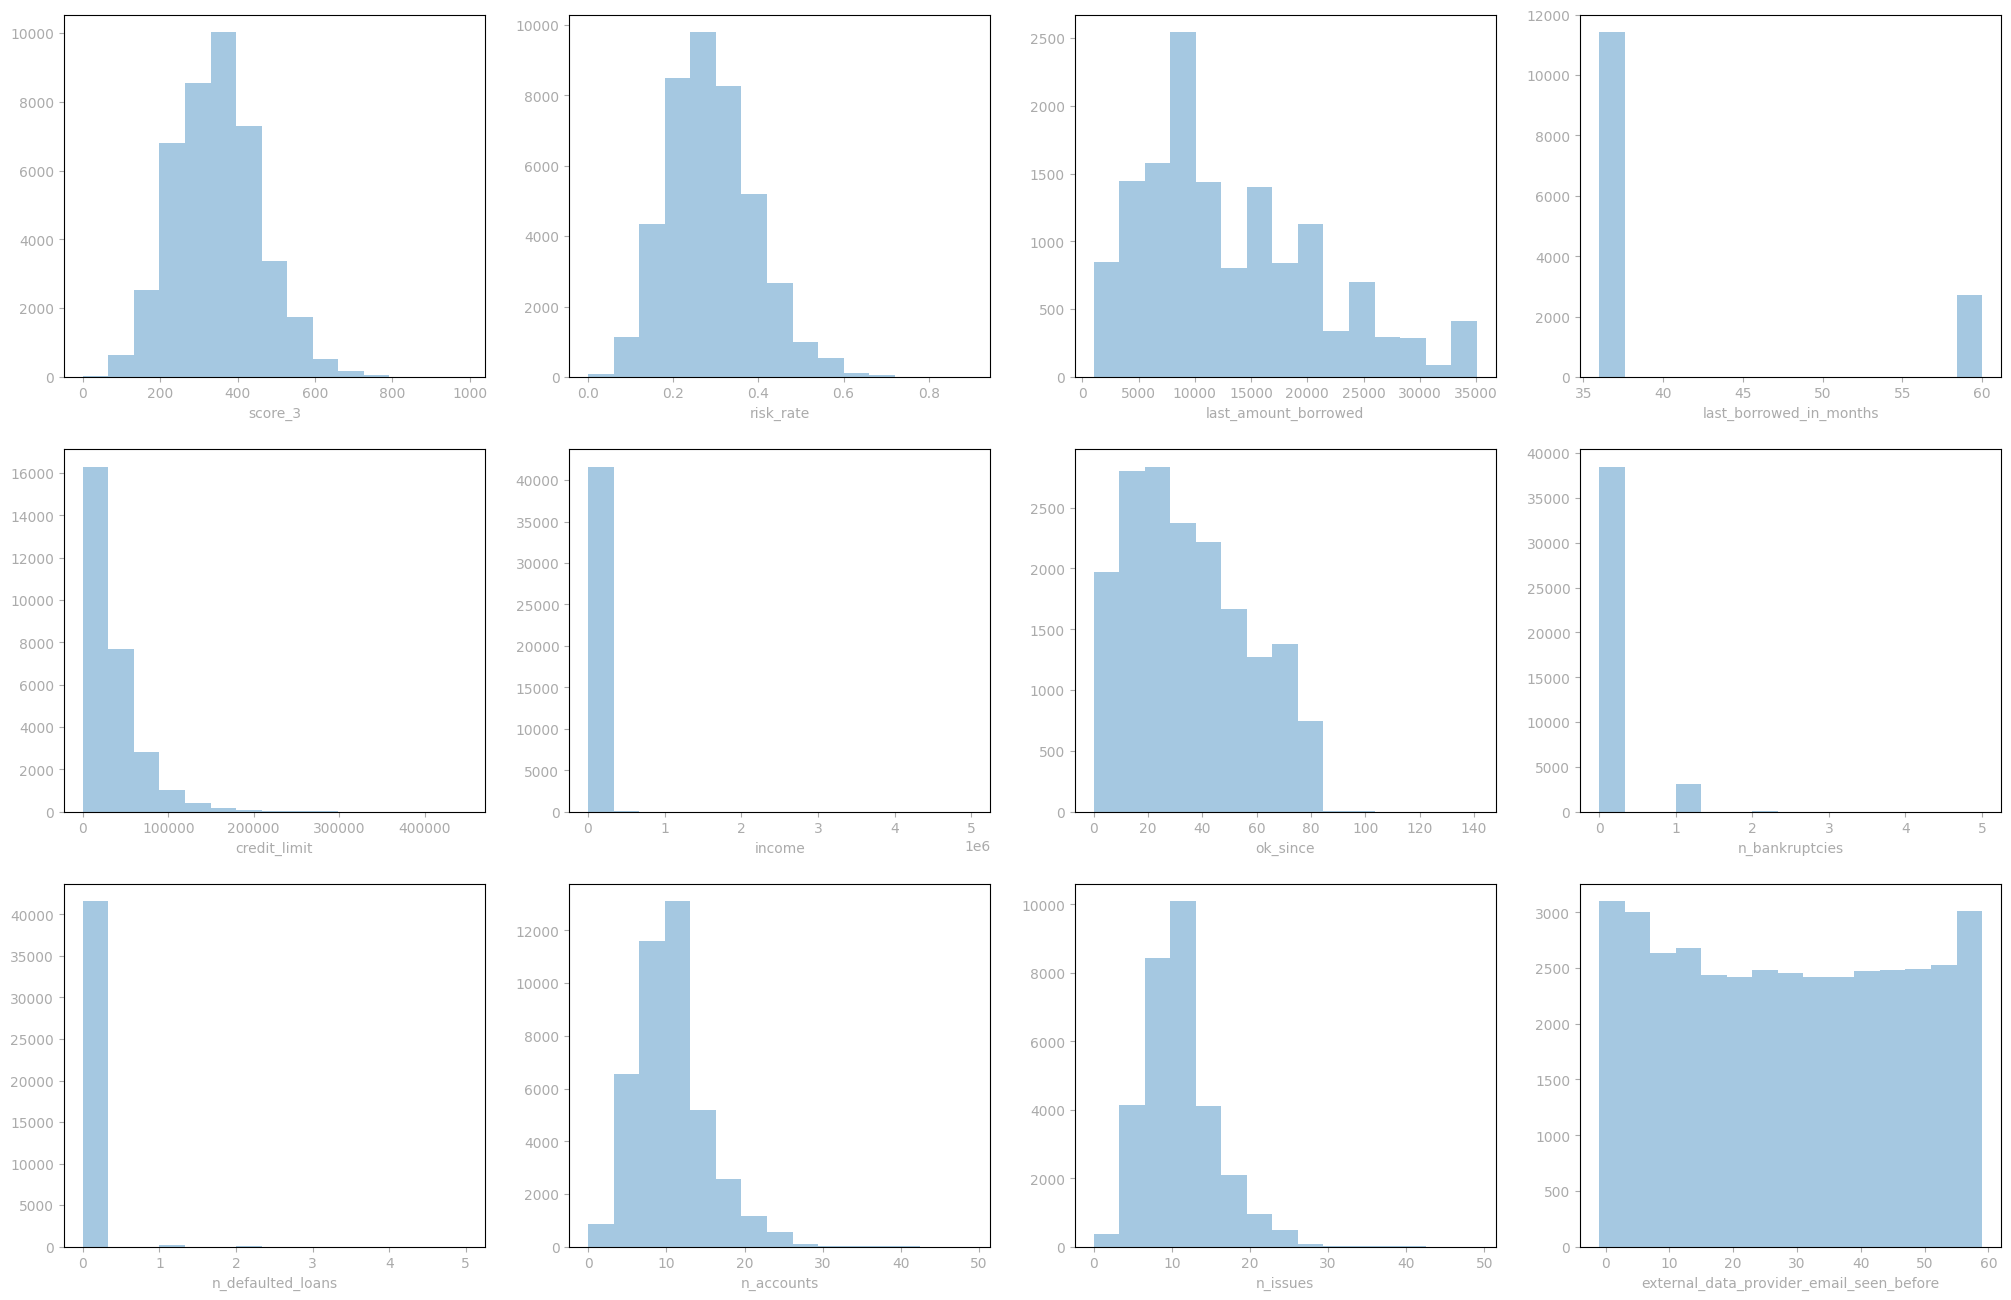

In [23]:
# plot a histogram for each of the features above

nrows = 3
ncols = 4

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 16))

r = 0
c = 0

for i in df_credit_numerical:
  sns.distplot(df_credit_numerical[i], bins=15,kde=False, ax=ax[r][c])
  if c == ncols - 1:
    r += 1
    c = 0
  else:
    c += 1

plt.show()

All these features above have missing values that need to be treated. As we can see, they have skewed distribution, which is an indication that we should fill the missing values with the median value for each feature.

It's time to deal with the missing values from the remaining 32 columns. We are filling these values according to the particularities of each feature, as below:



*   Categorical variables will be filled with the most recurrent value.
*   Numerical variables will be filled with their median values.
*   In the specific cases of `last_amount_borrowed`, `last_borrowed_in_months` and `n_issues` we'll fill the missing values with zero, as it is reasonable to believe that not every client would have values assigned to these variables.



In [24]:
df_credit_num = df_credit.select_dtypes(exclude='object').columns
df_credit_cat = df_credit.select_dtypes(include='object').columns

# fill missing values for "last_amount_borrowed", "last_borrowed_in_months" and "n_issues"
df_credit['last_amount_borrowed'].fillna(value=0, inplace=True)
df_credit['last_borrowed_in_months'].fillna(value=0, inplace=True)
df_credit['n_issues'].fillna(value=0, inplace=True)

# fill missing values for numerical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_credit.loc[:, df_credit_num])
df_credit.loc[:, df_credit_num] = imputer.transform(df_credit.loc[:, df_credit_num])

# fill missing values for categorical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_credit.loc[:, df_credit_cat])
df_credit.loc[:, df_credit_cat] = imputer.transform(df_credit.loc[:, df_credit_cat])

In [25]:
df_credit.isnull().sum()

,0
target_default,0
score_1,0
score_2,0
score_3,0
score_4,0
score_5,0
score_6,0
risk_rate,0
last_amount_borrowed,0
last_borrowed_in_months,0


After handling the missing values, case by case, we now have a data set free of null values.

We'll now preprocess the data, converting the categorical features into numerical values. `LabelEncoder` will be used for the binary variables while `get_dummies` will be used for the other categorical variables.

In [26]:
bin_var = df_credit.nunique()[df_credit.nunique() == 2].keys().tolist()
num_var = [col for col in df_credit.select_dtypes(['int', 'float']).columns.tolist() if col not in bin_var]
cat_var = [col for col in df_credit.select_dtypes(['object']).columns.tolist() if col not in bin_var]

df_credit_encoded = df_credit.copy()

# label encoding for the binary variables
le = LabelEncoder()
for col in bin_var:
  df_credit_encoded[col] = le.fit_transform(df_credit_encoded[col])

# encoding with get_dummies for the categorical variables
df_credit_encoded = pd.get_dummies(df_credit_encoded, columns=cat_var)

df_credit_encoded.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,...,shipping_state_BR-PE,shipping_state_BR-PR,shipping_state_BR-RN,shipping_state_BR-RO,shipping_state_BR-RR,shipping_state_BR-RS,shipping_state_BR-SC,shipping_state_BR-SE,shipping_state_BR-SP,shipping_state_BR-TO
0,0,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,...,False,False,False,False,False,False,False,False,False,False
1,0,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,100018.91,...,False,False,False,False,False,True,False,False,False,False
2,1,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25213.0,65023.65,...,False,False,False,False,True,False,False,False,False,False
3,0,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,54591.0,68830.01,...,False,False,True,False,False,False,False,False,False,False
4,0,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,25213.0,60011.29,...,False,False,False,False,False,False,False,False,False,False


from matplotlib import pyplot as plt
_df_85['target_default'].plot(kind='hist', bins=20, title='target_default')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_86['score_3'].plot(kind='hist', bins=20, title='score_3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_87['score_4'].plot(kind='hist', bins=20, title='score_4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_88['score_5'].plot(kind='hist', bins=20, title='score_5')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_89.groupby('score_1_1Rk8w4Ucd5yR3KcqZzLdow==').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_90.groupby('score_1_8k8UDR4Yx0qasAjkGrUZLw==').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_91.groupby('score_1_DGCQep2AE5QRkNCshIAlFQ==').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_92.groupby('score_2_+CxEO4w7jv3QPI/BQbyqAA==').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_93.plot(kind='scatter', x='target_default', y='score_3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_94.plot(kind='scatter', x='score_3', y='score_4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_95.plot(kind='scatter', x='score_4', y='score_5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_96.plot(kind='scatter', x='score_5', y='score_6', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['n_defaulted_loans']
  ys = series['target_default']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_97.sort_values('n_defaulted_loans', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('score_1_1Rk8w4Ucd5yR3KcqZzLdow==')):
  _plot_series(series, series_name, i)
  fig.legend(title='score_1_1Rk8w4Ucd5yR3KcqZzLdow==', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('n_defaulted_loans')
_ = plt.ylabel('target_default')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['n_defaulted_loans']
  ys = series['target_default']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_98.sort_values('n_defaulted_loans', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('score_1_8k8UDR4Yx0qasAjkGrUZLw==')):
  _plot_series(series, series_name, i)
  fig.legend(title='score_1_8k8UDR4Yx0qasAjkGrUZLw==', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('n_defaulted_loans')
_ = plt.ylabel('target_default')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['n_defaulted_loans']
  ys = series['target_default']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_99.sort_values('n_defaulted_loans', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('score_1_DGCQep2AE5QRkNCshIAlFQ==')):
  _plot_series(series, series_name, i)
  fig.legend(title='score_1_DGCQep2AE5QRkNCshIAlFQ==', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('n_defaulted_loans')
_ = plt.ylabel('target_default')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['n_defaulted_loans']
  ys = series['target_default']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_100.sort_values('n_defaulted_loans', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('score_2_+CxEO4w7jv3QPI/BQbyqAA==')):
  _plot_series(series, series_name, i)
  fig.legend(title='score_2_+CxEO4w7jv3QPI/BQbyqAA==', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('n_defaulted_loans')
_ = plt.ylabel('target_default')

from matplotlib import pyplot as plt
_df_101['target_default'].plot(kind='line', figsize=(8, 4), title='target_default')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_102['score_3'].plot(kind='line', figsize=(8, 4), title='score_3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_103['score_4'].plot(kind='line', figsize=(8, 4), title='score_4')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_104['score_5'].plot(kind='line', figsize=(8, 4), title='score_5')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['score_1_8k8UDR4Yx0qasAjkGrUZLw=='].value_counts()
    for x_label, grp in _df_105.groupby('score_1_1Rk8w4Ucd5yR3KcqZzLdow==')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('score_1_1Rk8w4Ucd5yR3KcqZzLdow==')
_ = plt.ylabel('score_1_8k8UDR4Yx0qasAjkGrUZLw==')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['score_1_DGCQep2AE5QRkNCshIAlFQ=='].value_counts()
    for x_label, grp in _df_106.groupby('score_1_8k8UDR4Yx0qasAjkGrUZLw==')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('score_1_8k8UDR4Yx0qasAjkGrUZLw==')
_ = plt.ylabel('score_1_DGCQep2AE5QRkNCshIAlFQ==')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['score_2_+CxEO4w7jv3QPI/BQbyqAA=='].value_counts()
    for x_label, grp in _df_107.groupby('score_1_DGCQep2AE5QRkNCshIAlFQ==')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('score_1_DGCQep2AE5QRkNCshIAlFQ==')
_ = plt.ylabel('score_2_+CxEO4w7jv3QPI/BQbyqAA==')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['score_2_Fv28Bz0YRTVAT5kl1bAV6g=='].value_counts()
    for x_label, grp in _df_108.groupby('score_2_+CxEO4w7jv3QPI/BQbyqAA==')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('score_2_+CxEO4w7jv3QPI/BQbyqAA==')
_ = plt.ylabel('score_2_Fv28Bz0YRTVAT5kl1bAV6g==')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_109['score_1_1Rk8w4Ucd5yR3KcqZzLdow=='].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_109, x='target_default', y='score_1_1Rk8w4Ucd5yR3KcqZzLdow==', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_110['score_1_8k8UDR4Yx0qasAjkGrUZLw=='].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_110, x='target_default', y='score_1_8k8UDR4Yx0qasAjkGrUZLw==', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_111['score_1_DGCQep2AE5QRkNCshIAlFQ=='].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_111, x='target_default', y='score_1_DGCQep2AE5QRkNCshIAlFQ==', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_112['score_2_+CxEO4w7jv3QPI/BQbyqAA=='].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_112, x='target_default', y='score_2_+CxEO4w7jv3QPI/BQbyqAA==', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

After encoding the categorical variables, let's start working on the machine learning models.

## Machine Learning Models

We are experimenting with the following 3 boosting algorithms to determine which one yields better results:


*   XGBoost
*   LightGBM
*   CatBoost

Before starting with the models, let's split the data into training and test sets.

In [27]:
# feature matrix
X = df_credit_encoded.drop('target_default', axis=1)

# target vector
y = df_credit_encoded['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

Now, as we are dealing with an unbalanced data set, we'll standardize and resample the training set, with `StandardScaler` and `RandomUnderSampler`, respectively.

In [29]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# Print shapes to verify the resampling
print("Original training set shape:", X_train.shape, y_train.shape)
print("Resampled training set shape:", X_train_resampled.shape, y_train_resampled.shape)

# Print class distribution
print("Original class distribution:", np.bincount(y_train))
print("Resampled class distribution:", np.bincount(y_train_resampled))

Original training set shape: (800, 20) (800,)
Resampled training set shape: (166, 20) (166,)
Original class distribution: [717  83]
Resampled class distribution: [83 83]


We're all set up to start evaluating the models. It's worth mentioning that we should consider `Precision`, `Recall` and `F1 Score` as evaluation metrics, for the following reasons:


*   **Precision** will give us the proportion of positive identifications that were indeed correct. It can be defined as:

${Precision} = \frac{True Positives}{True Positives + False Positives}$


*   **F1 Score** is a metric that is useful when we need to seek a balance between precision and recall. The formula is defined as:

${F_1} = 2 \times \frac{Precision \times Recall}{Precision + Recall}$


Since our objective is to minimize company loss, predicting the risk of client default, a good recall rate is desirable because we want to identify the maximum amount of clients that are indeed prone to stop paying their debts, thus, we are pursuing a small number of *False Negatives*.

Additionally, we also seek to minimize the number of False Positives because we don't want clients to be mistakenly identified as defaulters. Therefore, a good precision rate is also desirable.

However, there is always a tradeoff between precision and recall. For this article, we chose to give more emphasis to recall, using it as our evaluation metric.

We'll use Cross-Validation to get better results. Instead of simply splitting the data into a train and test set, the cross_validate method splits our training data into k number of Folds, making better use of the data. In our case, we'll perform 5-fold cross-validation, as we let the default k value.

In [30]:
# define the function val_model
def val_model(X, y, clf, show=True):
    """
    Apply cross-validation on the training set.

    # Arguments
        X: DataFrame containing the independent variables.
        y: Series containing the target vector.
        clf: Scikit-learn estimator instance.

    # Returns
        float, mean value of the cross-validation scores.
    """

    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if show == True:
        print(f'Recall: {scores.mean()}, {scores.std()}')

    return scores.mean()

In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

def val_model(X_train, y_train, model, show=True):
    # Split the data into training and validation sets
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train_split, y_train_split)

    # Make predictions on the validation set
    y_pred = model.predict(X_val)

    # Calculate recall score
    recall = recall_score(y_val, y_pred)

    if show:
        print(f"Recall score: {recall:.4f}")

    return recall

# Initialize models
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lgb = LGBMClassifier()
cb = CatBoostClassifier(verbose=0)

models = [xgb, lgb, cb]
model_names = []
recall_scores = []

# Evaluate models
for clf in models:
    model_names.append(clf.__class__.__name__)
    recall_scores.append(val_model(X_train_resampled, y_train_resampled, clf, show=False))

# Create a DataFrame with the results
results_df = pd.DataFrame(data=recall_scores, index=model_names, columns=['Recall'])

print("Model Evaluation Results:")
print(results_df)

# Find the best model
best_model = results_df['Recall'].idxmax()
print(f"\nBest performing model: {best_model}")

[LightGBM] [Info] Number of positive: 69, number of negative: 63
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 132, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.522727 -> initscore=0.090972
[LightGBM] [Info] Start training from score 0.090972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

Notice that all three models yielded similar results. We'll now tune some hyperparameters on the models to see if we can achieve higher score values. The method utilized here is `GridSearchCV`, which will search over specified parameter values for each estimator.

### XGBoost

Let's start by making some adjustments to the XGBoost estimator. XGBoost is known for being one of the most effective Machine Learning algorithms, due to its good performance on structured and tabular datasets on classification and regression predictive modeling problems. It is highly customizable and counts with a large range of hyperparameters to be tuned.

For the XGBoost model, we'll tune the following hyperparameters, according to [the official documentation](https://xgboost.readthedocs.io/en/latest/parameter.html):


*   `n_estimators` - The number of trees in the model
*   `max_depth` - Maximum depth of a tree
*   `min_child_weight` - Minimum sum of instance weight needed in a child
*   `gamma` - Minimum loss reduction required to make a further partition on a leaf node of the tree
*   `learning_rate` - Step size shrinkage used in the update to prevents overfitting

In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# Initialize XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid
param_grid = {'n_estimators': range(50, 1001, 50)}

# Set up StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="recall",
    n_jobs=-1,
    cv=kfold,
    verbose=1
)

# Fit GridSearchCV
grid_result = grid_search.fit(X_train_resampled, y_train_resampled)

# Print results
print(f'Best recall score: {grid_result.best_score_:.4f}')
print(f'Best parameters: {grid_result.best_params_}')

# Create a DataFrame of the grid search results
results = pd.DataFrame(grid_result.cv_results_)
results = results.sort_values(by=['rank_test_score'])

print("\nTop 5 configurations:")
print(results[['params', 'mean_test_score', 'std_test_score']].head())

# Train the best model on the full training set
best_xgb = XGBClassifier(**grid_result.best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(X_train_resampled, y_train_resampled)

# Evaluate on the test set
from sklearn.metrics import classification_report
y_pred = best_xgb.predict(X_test_scaled)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best recall score: 0.8792
Best parameters: {'n_estimators': 250}

Top 5 configurations:
                   params  mean_test_score  std_test_score
9   {'n_estimators': 500}         0.879189        0.034986
17  {'n_estimators': 900}         0.879189        0.034986
16  {'n_estimators': 850}         0.879189        0.034986
15  {'n_estimators': 800}         0.879189        0.034986
14  {'n_estimators': 750}         0.879189        0.034986

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       180
           1       0.33      0.75      0.45        20

    accuracy                           0.82       200
   macro avg       0.65      0.79      0.67       200
weighted avg       0.90      0.82      0.85       200



In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# Initialize XGBoost classifier
xgb = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [1, 3, 5],
    'min_child_weight': [1, 3, 6]
}

# Set up StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="recall",
    n_jobs=-1,
    cv=kfold,
    verbose=1
)

# Fit GridSearchCV
grid_result = grid_search.fit(X_train_resampled, y_train_resampled)

# Print results
print(f'Best recall score: {grid_result.best_score_:.4f}')
print(f'Best parameters: {grid_result.best_params_}')

# Create a DataFrame of the grid search results
results = pd.DataFrame(grid_result.cv_results_)
results = results.sort_values(by=['rank_test_score'])

print("\nAll configurations:")
print(results[['params', 'mean_test_score', 'std_test_score']])

# Train the best model on the full training set
best_xgb = XGBClassifier(n_estimators=50, **grid_result.best_params_,
                         use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(X_train_resampled, y_train_resampled)

# Evaluate on the test set
y_pred = best_xgb.predict(X_test_scaled)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best recall score: 0.8792
Best parameters: {'max_depth': 1, 'min_child_weight': 6}

All configurations:
                                    params  mean_test_score  std_test_score
2  {'max_depth': 1, 'min_child_weight': 6}         0.879189        0.034986
1  {'max_depth': 1, 'min_child_weight': 3}         0.866843        0.046945
4  {'max_depth': 3, 'min_child_weight': 3}         0.866843        0.046945
7  {'max_depth': 5, 'min_child_weight': 3}         0.866843        0.046945
5  {'max_depth': 3, 'min_child_weight': 6}         0.854938        0.031899
8  {'max_depth': 5, 'min_child_weight': 6}         0.854938        0.031899
0  {'max_depth': 1, 'min_child_weight': 1}         0.843034        0.061640
3  {'max_depth': 3, 'min_child_weight': 1}         0.843034        0.061640
6  {'max_depth': 5, 'min_child_weight': 1}         0.843034        0.061640

Classification Report on Test Set:
              precision    recall  f1-sc

In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# Initialize XGBoost classifier with fixed parameters
xgb = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    min_child_weight=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Define parameter grid for gamma
param_grid = {'gamma': [0, 1, 5]}

# Set up StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="recall",
    n_jobs=-1,
    cv=kfold,
    verbose=1
)

# Fit GridSearchCV
grid_result = grid_search.fit(X_train_resampled, y_train_resampled)

# Print results
print(f'Best recall score: {grid_result.best_score_:.4f}')
print(f'Best parameters: {grid_result.best_params_}')

# Create a DataFrame of the grid search results
results = pd.DataFrame(grid_result.cv_results_)
results = results.sort_values(by=['rank_test_score'])

print("\nAll configurations:")
print(results[['params', 'mean_test_score', 'std_test_score']])

# Train the best model on the full training set
best_xgb = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    min_child_weight=6,
    **grid_result.best_params_,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
best_xgb.fit(X_train_resampled, y_train_resampled)

# Evaluate on the test set
y_pred = best_xgb.predict(X_test_scaled)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best recall score: 0.8911
Best parameters: {'gamma': 5}

All configurations:
         params  mean_test_score  std_test_score
2  {'gamma': 5}         0.891093        0.051800
1  {'gamma': 1}         0.879189        0.034986
0  {'gamma': 0}         0.854938        0.031899

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       180
           1       0.40      0.80      0.53        20

    accuracy                           0.86       200
   macro avg       0.69      0.83      0.73       200
weighted avg       0.92      0.86      0.88       200



In [43]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# Initialize XGBoost classifier with fixed parameters
xgb = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    min_child_weight=6,
    gamma=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Define parameter grid for learning_rate
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

# Set up StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="recall",
    n_jobs=-1,
    cv=kfold,
    verbose=1
)

# Fit GridSearchCV
grid_result = grid_search.fit(X_train_resampled, y_train_resampled)

# Print results
print(f'Best recall score: {grid_result.best_score_:.4f}')
print(f'Best parameters: {grid_result.best_params_}')

# Create a DataFrame of the grid search results
results = pd.DataFrame(grid_result.cv_results_)
results = results.sort_values(by=['rank_test_score'])

print("\nAll configurations:")
print(results[['params', 'mean_test_score', 'std_test_score']])

# Train the best model on the full training set
best_xgb = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    min_child_weight=6,
    gamma=1,
    **grid_result.best_params_,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
best_xgb.fit(X_train_resampled, y_train_resampled)

# Evaluate on the test set
y_pred = best_xgb.predict(X_test_scaled)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best recall score: 0.8787
Best parameters: {'learning_rate': 0.001}

All configurations:
                      params  mean_test_score  std_test_score
1   {'learning_rate': 0.001}         0.878748        0.062905
2    {'learning_rate': 0.01}         0.878748        0.062905
3     {'learning_rate': 0.1}         0.866843        0.046945
0  {'learning_rate': 0.0001}         0.654762        0.463216

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       180
           1       0.32      0.85      0.47        20

    accuracy                           0.81       200
   macro avg       0.65      0.82      0.67       200
weighted avg       0.91      0.81      0.84       200



### LightGBM

Now, turning to the LightGBM model, another tree-based learning algorithm, we are going to tune the following hyperparameters, referring to the [documentation](https://lightgbm.readthedocs.io/en/latest/Parameters.html):

*   `max_depth` - Maximum depth of a tree
*   `learning_rate` - Shrinkage rate
*   `num_leaves` - Max number of leaves in one tree
*   `min_data_in_leaf` - Minimal number of data in one leaf



In [45]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from lightgbm import LGBMClassifier

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# Initialize LightGBM classifier
lgb = LGBMClassifier(silent=False, random_state=42)

# Define parameter grid
param_grid = {
    "max_depth": np.arange(5, 75, 10),
    "learning_rate": [0.001, 0.01, 0.1],
    "num_leaves": np.arange(20, 220, 50)
}

# Set up StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=lgb,
    param_grid=param_grid,
    scoring="recall",
    n_jobs=-1,
    cv=kfold,
    verbose=1
)

# Fit GridSearchCV
grid_result = grid_search.fit(X_train_resampled, y_train_resampled)

# Print results
print(f'Best recall score: {grid_result.best_score_:.4f}')
print(f'Best parameters: {grid_result.best_params_}')

# Create a DataFrame of the grid search results
results = pd.DataFrame(grid_result.cv_results_)
results = results.sort_values(by=['rank_test_score'])

print("\nTop 5 configurations:")
print(results[['params', 'mean_test_score', 'std_test_score']].head())

# Train the best model on the full training set
best_lgb = LGBMClassifier(
    **grid_result.best_params_,
    silent=False,
    random_state=42
)
best_lgb.fit(X_train_resampled, y_train_resampled)

# Evaluate on the test set
y_pred = best_lgb.predict(X_test_scaled)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 84 candidates, totalling 252 fits
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 83, number of negative: 83
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1140
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from lightgbm import LGBMClassifier

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# Initialize LightGBM classifier with fixed parameters
lgb = LGBMClassifier(
    learning_rate=0.01,
    max_depth=5,
    num_leaves=50,
    silent=False,
    random_state=42
)

# Define parameter grid for min_data_in_leaf
param_grid = {'min_data_in_leaf': np.arange(100, 1000, 100)}

# Set up StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=lgb,
    param_grid=param_grid,
    scoring="recall",
    n_jobs=-1,
    cv=kfold,
    verbose=1
)

# Fit GridSearchCV
grid_result = grid_search.fit(X_train_resampled, y_train_resampled)

# Print results
print(f'Best recall score: {grid_result.best_score_:.4f}')
print(f'Best parameters: {grid_result.best_params_}')

# Create a DataFrame of the grid search results
results = pd.DataFrame(grid_result.cv_results_)
results = results.sort_values(by=['rank_test_score'])

print("\nAll configurations:")
print(results[['params', 'mean_test_score', 'std_test_score']])

# Train the best model on the full training set
best_lgb = LGBMClassifier(
    learning_rate=0.01,
    max_depth=5,
    num_leaves=50,
    silent=False,
    random_state=42,
    **grid_result.best_params_
)
best_lgb.fit(X_train_resampled, y_train_resampled)

# Evaluate on the test set
y_pred = best_lgb.predict(X_test_scaled)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Number of positive: 83, number of negative: 83
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] 

### CatBoost

Lastly, we're going to search over hyperparameter values for CatBoost, our third gradient boosting algorithm. The following hyperparameters will be tuned, according to the [documentation](https://catboost.ai/docs/concepts/parameter-tuning.html):


*   `depth` - Depth of the tree
*   `learning_rate` - As we already know, the learning rate
*   `l2_leaf_reg` - Coefficient at the L2 regularization term of the cost function



In [52]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler


# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample the training data using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train) # Define X_train_rus and y_train_rus

# Initialize CatBoost classifier with necessary parameters
cb = CatBoostClassifier(
    random_state=42,
    verbose=False,  # Suppress CatBoost's own verbose output
    allow_writing_files=False  # Prevent CatBoost from writing files
)

# Define parameters to be searched
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.03, 0.1],
    'l2_leaf_reg': [1, 5, 10],
    'iterations': [100, 200]  # Add number of iterations
}

# Set up k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=cb,
    param_grid=param_grid,
    scoring="recall",
    n_jobs=-1,
    cv=kfold,
    verbose=1
)

# Perform grid search
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# Print best results
print(f'Best result: {grid_result.best_score_:.4f} for {grid_result.best_params_}')

# If you want to see all results
print("\nAll results:")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.4f} (+/-{stdev:.4f}) for {param}")

# Train the model with the best parameters
best_model = CatBoostClassifier(**grid_result.best_params_, random_state=42, verbose=False)
best_model.fit(X_train_rus, y_train_rus)

# Now you can use best_model for predictions on your test set
# y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best result: 0.8792 for {'depth': 10, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.1}

All results:
0.8549 (+/-0.0782) for {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.03}
0.8673 (+/-0.0737) for {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
0.8549 (+/-0.0782) for {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.03}
0.8668 (+/-0.0690) for {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
0.8549 (+/-0.0782) for {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 10, 'learning_rate': 0.03}
0.8311 (+/-0.0738) for {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 10, 'learning_rate': 0.1}
0.8549 (+/-0.0782) for {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.03}
0.8435 (+/-0.0731) for {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
0.8549 (+/-0.0782) for {'depth': 6, 'iterations': 200, 'l2_le

After tuning some hyperparameters, all three models displayed betters results. It is worth mentioning that XGBoost presented a great score increase, while LightGBM and CatBoost saw a meager improvement.

Now, we can check how these models perform on the **test set**. To help us visualize the results, we are plotting a **confusion matrix**.

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       180
           1       0.32      0.85      0.47        20

    accuracy                           0.81       200
   macro avg       0.65      0.82      0.67       200
weighted avg       0.91      0.81      0.84       200



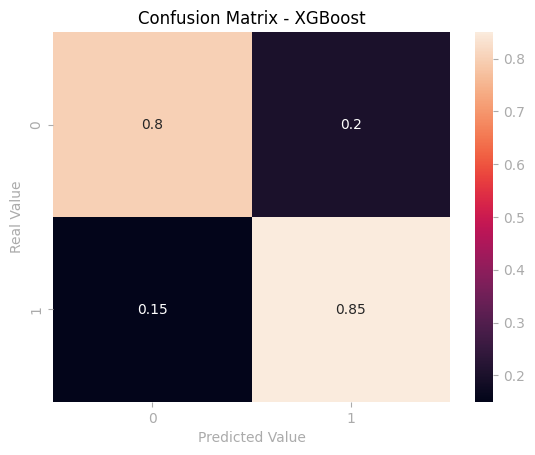

In [53]:
# final XGBoost model
xgb = XGBClassifier(max_depth=3, learning_rate=0.0001, n_estimators=50, gamma=1, min_child_weight=6)
xgb.fit(X_train_rus, y_train_rus)

# prediction
X_test_xgb = scaler.transform(X_test)
y_pred_xgb = xgb.predict(X_test_xgb)

# classification report
print(classification_report(y_test, y_pred_xgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - XGBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Info] Number of positive: 83, number of negative: 83
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no mo

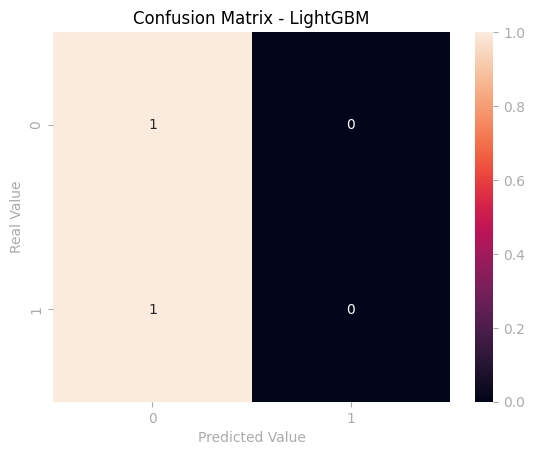

In [54]:
# final LightGBM model
lgb = LGBMClassifier(num_leaves=70, max_depth=5, learning_rate=0.01, min_data_in_leaf=400)
lgb.fit(X_train_rus, y_train_rus)

# prediction
X_test_lgb = scaler.transform(X_test)
y_pred_lgb = lgb.predict(X_test_lgb)

# classification report
print(classification_report(y_test, y_pred_lgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_lgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - LightGBM')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

              precision    recall  f1-score   support

           0       0.96      0.87      0.92       180
           1       0.38      0.70      0.49        20

    accuracy                           0.85       200
   macro avg       0.67      0.79      0.70       200
weighted avg       0.90      0.85      0.87       200



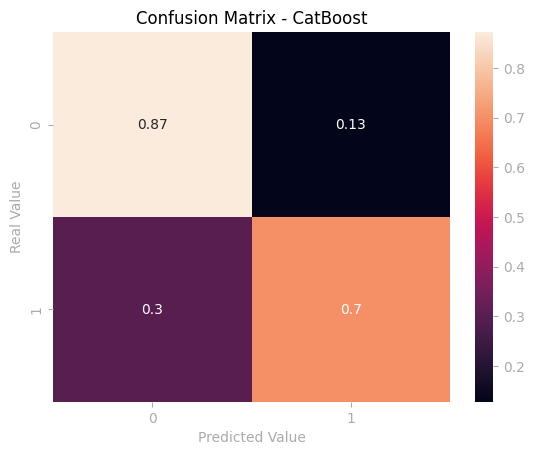

In [55]:
# final CatBoost model
cb = CatBoostClassifier(learning_rate=0.03, depth=6, l2_leaf_reg=5, logging_level='Silent')
cb.fit(X_train_rus, y_train_rus)

# prediction
X_test_cb = scaler.transform(X_test)
y_pred_cb = cb.predict(X_test_cb)

# classification report
print(classification_report(y_test, y_pred_cb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_cb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - CatBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

## Conclusion

The main objective of this article was to build a machine learning algorithm that would be able to identify potential defaulters and therefore reduce company loss. The best model possible would be the one that could minimize false negatives, identifying all defaulters among the client base, while also minimizing false positives, preventing clients to be wrongly classified as defaulters.

Meeting these requirements can be quite tricky as there is a tradeoff between precision and recall, meaning that increasing the value of one of these metrics often decreases the value of the other. Considering the importance of minimizing company loss, we decided to give more emphasis on reducing false positives, searching for the best hyperparameters that could increase the recall rate.

Among the three **Gradient Boosting Algorithms** tested, **XGBoost** yielded the best results, with a recall rate of 81%, although it delivered an undesired 56% of false positives. On the other hand, **LightGBM** and **CatBoost** delivered a better count of false positives, with 38% and 33% respectively, but their false negatives were substantially higher than that of XGBoost, resulting in a weaker recall rate.

This article presents a classic evaluation metrics dilemma. In this case, it would be up to the company's decision-makers to analyze the big picture, with the aid of the machine learning algorithms, and decide the best plan to follow. Of course, in a future article, we can test a different approach to achieve a more desirable result, such as taking advantage of deep learning models.